# Hypothesis 2:
Crimes tend to increase around the holiday

import packages and read in csv

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import function_with_doctest as fn
modified_boston = pd.read_csv('prep_data/modified_boston_crime.csv')

Create function for generate line chart with holidays labels.
Function is created by modifying codes in: https://www.kaggle.com/code/heesoo37/boston-crimes-starter-eda

Generate line charts of year 2016, 2017 and 2018.

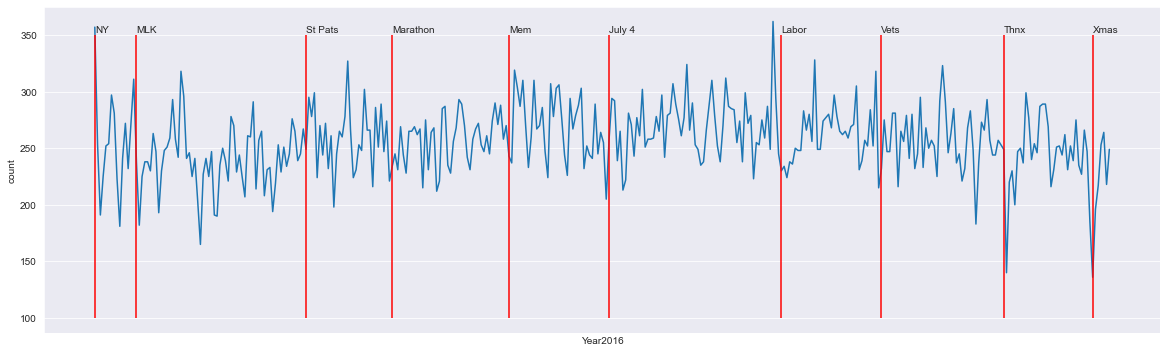

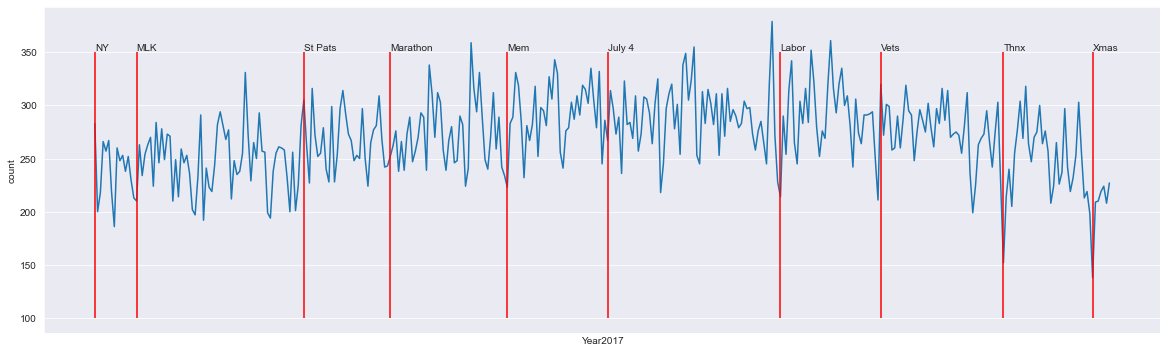

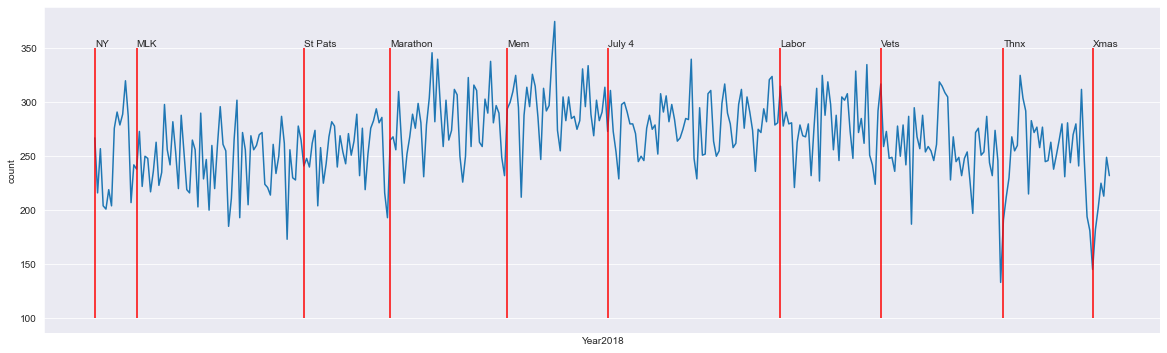

In [2]:
fn.holiday_situation('2016',modified_boston,100,350)
fn.holiday_situation('2017',modified_boston,100,350)
fn.holiday_situation('2018',modified_boston,100,350)

# Conclusion:
Crimes tend to decrease during Christmas and Thanksgiving day

# Farther thinking:
Will the amount of various crimes change differently during hours, days or years?

Read in csv and reshape dataframe for hour, days and years.

In [3]:
df_boston = fn.get_boston_crime()

Show the heatmap of various crimes change by years.

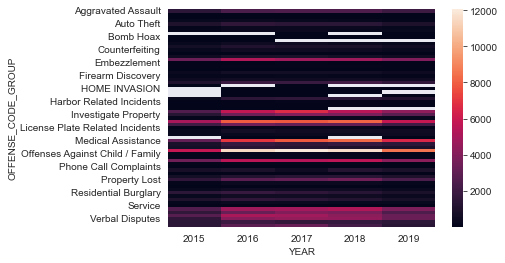

In [4]:
fn.heat_map(df_boston, 'year')

Show the heatmap of various crimes change by days.

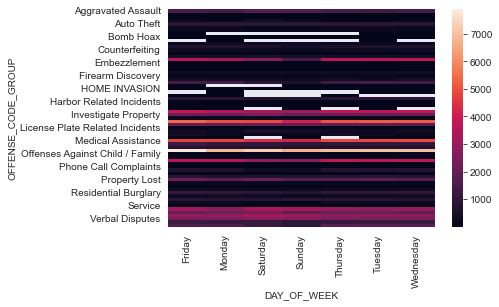

In [5]:
fn.heat_map(df_boston, 'day')

Show the heatmap of various crimes change by hours.

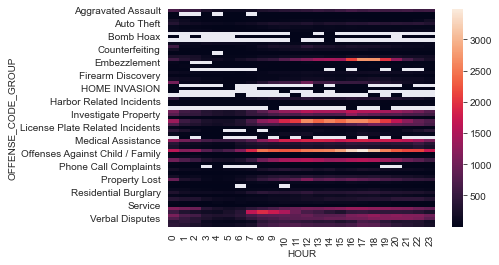

In [6]:
fn.heat_map(df_boston, 'hour')

Read in original crime data of Denver.

In [7]:
df2 = pd.read_csv('data/marijuana_crime.csv')

Formalize time data and clean blank values of data of Denver.

In [8]:
df2 = df2[['OFFENSE_CATEGORY_ID','REPORTDATE','INCIDENT_ADDRESS']]
df2.columns=['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE','STREET']
df2.dropna(axis=0, how='any', inplace=True)

In [9]:
df2['OFFENSE_CODE_GROUP'].unique()

array(['Drug Offenses', 'Burglary', 'Agg ASLT-Other',
       'Theft from Motor Vehicle', 'Larceny', 'Robbery-Street-Res',
       'Simple Assault', 'Criminal Mischief-Vehicle', 'All Other Crimes',
       'Criminal Mischief-Property', 'Robbery-Business',
       'Weapons Offense', 'Auto Theft', 'Agg ASLT-Firearm',
       'Criminal Mischief-Graffiti'], dtype=object)

In [10]:
ID_to_Group = {'Drug Offenses':'Drug Violation',
               'Burglary':'Burglary - No Property Taken',
               'Agg ASLT-Other':'Aggravated Assault',
               'Theft from Motor Vehicle':'Auto Theft',
               'Larceny':'Larceny',
               'Simple Assault':'Simple Assault',
               'Robbery-Street-Res':'Robbery',
               'Criminal Mischief-Vehicle':'Other',
               'All Other Crimes':'Other',
               'Robbery-Business':'Robbery',
               'Weapons Offense':'Firearm Discovery',
               'Auto Theft':'Auto Theft',
               'Agg ASLT-Firearm':'Firearm Violations',
               'Criminal Mischief-Graffiti':'Other'
               }
df2['OFFENSE_CODE_GROUP'].map(ID_to_Group)

def date_modify(date):
    """
    Modify the data inputted, return a str likes '2021-01-01'

    :param date: a str of date likes '01-JAN-21'
    :return: a str of date likes '2021-01-01'
    """
    month_list = {'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06','JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12'}
    date = str(date).split('-')
    month = month_list[date[1]]
    year = '20' + date[2]
    return year + '-' + month + '-' + date[0]

df2['OCCURRED_ON_DATE'] = df2['OCCURRED_ON_DATE'].apply(date_modify)

Output to csv.

In [11]:
df2.to_csv('prep_data/modified_marijuana_crime.csv', index = False)

Read in modified crime data of Denver.

In [12]:
df_denver = pd.read_csv('prep_data/modified_marijuana_crime.csv')

Build function for create columns of day of week.

In [13]:
def day_of_week(date):
    """
    return day of week as a str

    :param date: a str likes'2017-06-01'
    :return: str of day of week
    """
    weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    date = date.split('-')
    day = int(date[2])
    month = int(date[1])
    year = int(date[0])
    return weekday[datetime.date(day=day, month=month, year=year).weekday()]

In [14]:
df_denver['OFFENSE_CODE'] = df_denver['OFFENSE_CODE_GROUP']
df_denver['YEAR'] = df_denver['OCCURRED_ON_DATE'].str[:4]
df_denver['DAY_OF_WEEK'] = df_denver['OCCURRED_ON_DATE'].apply(day_of_week)

Show the heatmap of various crimes change by years.

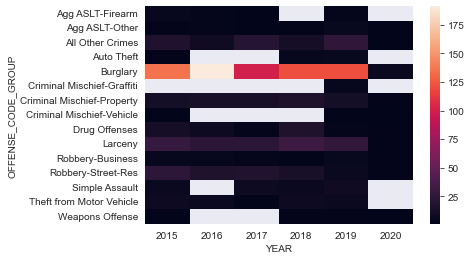

In [15]:
fn.heat_map(df_denver, 'year')

Show the heatmap of various crimes change by days.

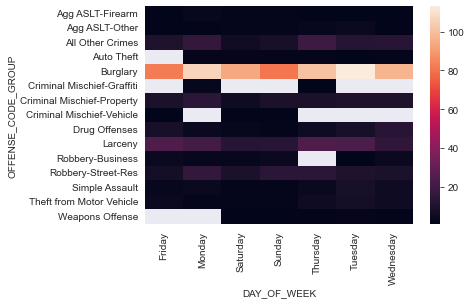

In [16]:
fn.heat_map(df_denver, 'day')

# Conclusion:
Some types of crimes such as offenses against children/family and investigate property change differently during hours.